In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
df = pd.read_csv("./2024baseball.csv")

In [58]:
df.head(10)

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,Playoff
0,Arizona Diamondbacks,51,28.6,5.38,143,5528,4865,770,1269,236,...,0.768,113,2108,99,71,31,58,16,971,1
1,Atlanta Braves,54,29.2,4.27,142,5303,4790,606,1154,239,...,0.716,97,1962,106,50,9,35,9,938,0
2,Baltimore Orioles,58,27.0,4.97,143,5447,4903,710,1230,235,...,0.758,119,2160,64,60,6,40,12,968,1
3,Boston Red Sox,53,27.3,4.75,142,5448,4909,674,1255,274,...,0.752,107,2112,92,62,6,37,25,987,0
4,Chicago Cubs,52,27.9,4.51,142,5354,4763,641,1139,231,...,0.707,98,1869,69,66,14,34,17,961,1
5,Chicago White Sox,61,28.0,3.06,143,5164,4735,437,1045,208,...,0.619,76,1611,107,38,17,23,6,890,0
6,Cincinnati Reds,60,27.1,4.46,143,5285,4712,638,1097,235,...,0.703,93,1872,74,78,16,40,7,871,0
7,Cleveland Guardians,48,26.2,4.51,142,5247,4689,641,1118,217,...,0.706,97,1859,101,85,16,39,28,863,1
8,Colorado Rockies,53,27.9,4.20,143,5332,4825,601,1167,243,...,0.702,89,1919,109,46,16,39,18,917,0
9,Detroit Tigers,47,26.9,4.19,143,5312,4816,599,1119,215,...,0.681,91,1852,80,48,3,34,10,912,0


In [59]:
df.drop('Tm', axis=1, inplace=True)

In [65]:
#  Not Directly Calculable: Unlike some other statistics, LOB isn't directly calculable from the other columns, making it a good candidate for prediction.
X = df.iloc[:, 0:28]
y = df.iloc[:, 28]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [90]:
X_train.head()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
20,45,29.1,4.92,142,5448,4880,699,1269,254,22,...,0.427,0.756,111,2083,98,55,9,39,20,1005
3,53,27.3,4.75,142,5448,4909,674,1255,274,29,...,0.430,0.752,107,2112,92,62,6,37,25,987
29,49,26.6,4.23,142,5263,4721,601,1158,243,16,...,0.379,0.692,97,1790,102,67,22,38,11,887
21,51,28.6,4.23,142,5360,4819,600,1132,206,16,...,0.370,0.672,87,1784,88,53,16,41,14,973
11,50,27.7,4.75,143,5282,4797,679,1217,245,31,...,0.417,0.727,101,1998,80,47,21,48,20,864


In [91]:
df.columns

Index(['#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB', 'Playoff'],
      dtype='object')

In [92]:
# Scale the data so to undrestand importance of certain features based on variance 
Scaler = StandardScaler()

In [93]:
X_train = Scaler.fit_transform(X_train)

In [94]:
X_train = pd.DataFrame(X_train, columns=['#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB'])

In [95]:
X_train.head()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,-1.566846,1.168074,1.163657,-0.866025,1.247035,1.259989,1.127954,1.439562,1.238600,0.268959,...,1.239031,1.335045,1.300172,1.324021,0.106248,-0.392864,-0.729144,0.205586,0.881917,1.389027
1,0.172081,-0.842316,0.790702,-0.866025,1.247035,1.685281,0.743861,1.246625,2.231135,1.191104,...,1.362762,1.222324,0.875626,1.539129,-0.296376,0.081964,-1.202102,-0.041117,1.721838,0.987649
2,-0.697383,-1.624134,-0.350103,-0.866025,-0.972138,-1.071785,-0.377692,-0.090152,0.692706,-0.521451,...,-0.740669,-0.468499,-0.185739,-0.849302,0.374664,0.421127,1.320341,0.082234,-0.629941,-1.242227
3,-0.262651,0.609632,-0.350103,-0.866025,0.191429,0.365409,-0.393056,-0.448463,-1.143482,-0.521451,...,-1.111863,-1.032106,-1.247104,-0.893807,-0.564793,-0.528529,0.374425,0.452288,-0.125988,0.675467
4,-0.480017,-0.395563,0.790702,0.866025,-0.744223,0.042774,0.820679,0.722939,0.791960,1.454574,...,0.826593,0.517814,0.238807,0.693535,-1.101625,-0.935525,1.162689,1.315748,0.881917,-1.755098


In [96]:
#  PCA 
pca1 = PCA()
X_pca1 = pca1.fit_transform(X_train)

In [97]:
pca1.explained_variance_ratio_.round(3)

array([0.464, 0.118, 0.091, 0.066, 0.052, 0.046, 0.041, 0.031, 0.024,
       0.017, 0.015, 0.012, 0.009, 0.005, 0.003, 0.003, 0.002, 0.001,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

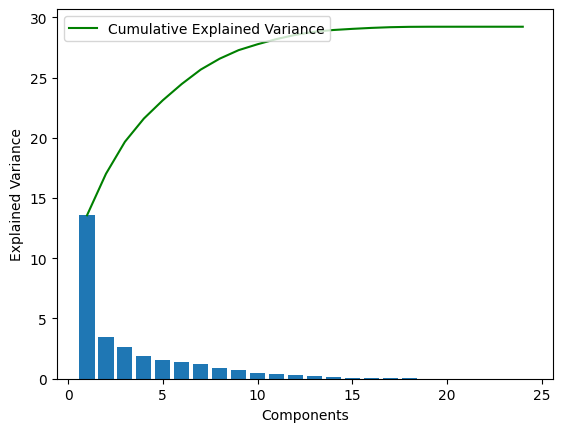

In [98]:
plt.bar(range(1, len(pca1.explained_variance_)+1), pca1.explained_variance_)
plt.ylabel("Explained Variance")
plt.xlabel("Components")
plt.plot(range(1, len(pca1.explained_variance_)+1), np.cumsum(pca1.explained_variance_), c="g", label="Cumulative Explained Variance")
plt.legend(loc="upper left")

In [99]:
pca2 = PCA(0.95)
X_pca2 = pca2.fit_transform(X_train)

In [100]:
X_pca2.shape

(24, 10)

In [101]:
pca2.explained_variance_ratio_

array([0.46433027, 0.11786978, 0.09094268, 0.0659477 , 0.05196823,
       0.0462769 , 0.04085351, 0.03100088, 0.02422976, 0.01676525])

In [102]:
# pca of 2 components
pca2c = PCA(n_components=2)
X_pca2c = pca2c.fit_transform(X_train)

In [103]:
pca2c.explained_variance_ratio_

array([0.46433027, 0.11786978])

In [104]:
colormap = plt.get_cmap("coolwarm")

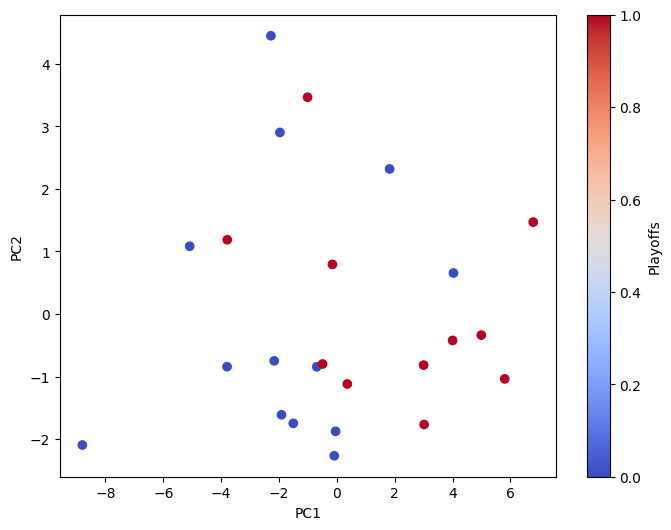

In [112]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca2c[:,0], X_pca2c[:,1], c=y_train, cmap=colormap)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Playoffs")
plt.show()

In [113]:
# pca of 3 components
pca3c = PCA(n_components=3)
X_pca3c = pca3c.fit_transform(X_train)

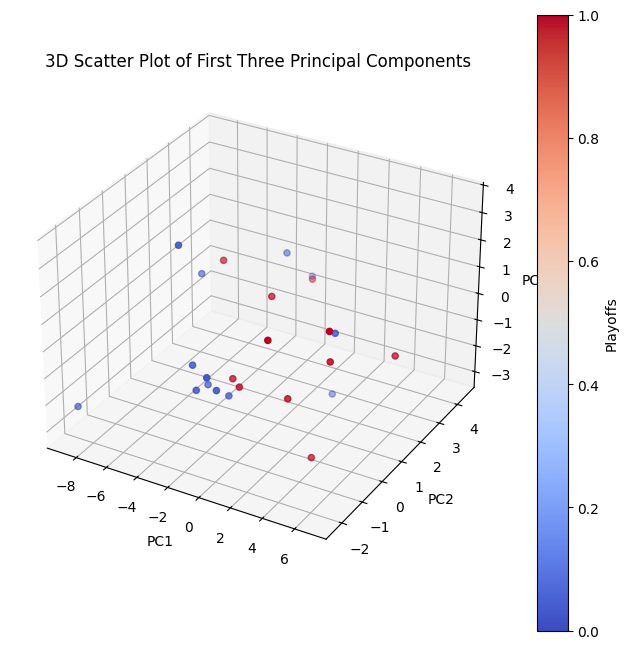

In [122]:
# Create a new figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(X_pca3c[:, 0], X_pca3c[:, 1], X_pca3c[:, 2], 
                     c=y_train, cmap='coolwarm')

# Set labels for each axis
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add a color bar
plt.colorbar(scatter, label='Playoffs')

# Add a title
plt.title('3D Scatter Plot of First Three Principal Components')

# Show the plot
plt.show()